In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
bank_df = pd.read_csv('/content/drive/MyDrive/Supervised ML/Logistic Regression/bank-formatted.csv')
print(bank_df.head())

   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4   

In [3]:
print('>>> Rows <<<')
print(bank_df.count())

>>> Rows <<<
age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp_var_rate      41188
cons_price_idx    41188
cons_conf_idx     41188
euribor3m         41188
nr_employed       41188
y                 41188
dtype: int64


In [4]:
print('>>> Info <<<')
print(bank_df.info())

>>> Info <<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41

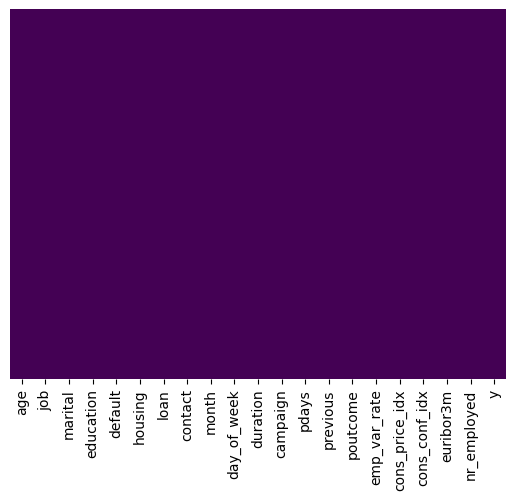

In [24]:
sns.heatmap(bank_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Encoding

In [5]:
categorical_cols = bank_df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [7]:
bank_df_encoded = pd.get_dummies(bank_df, columns=categorical_cols)

pd.set_option('display.max_columns', None)
print(bank_df_encoded.head())

   age  duration  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0   44       210         1    999         0           1.4          93.444   
1   53       138         1    999         0          -0.1          93.200   
2   28       339         3      6         2          -1.7          94.055   
3   39       185         2    999         0          -1.8          93.075   
4   55       137         1      3         1          -2.9          92.201   

   cons_conf_idx  euribor3m  nr_employed  y  job_admin.  job_blue-collar  \
0          -36.1      4.963       5228.1  0       False             True   
1          -42.0      4.021       5195.8  0       False            False   
2          -39.8      0.729       4991.6  1       False            False   
3          -47.1      1.405       5099.1  0       False            False   
4          -31.4      0.869       5076.2  1       False            False   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0            

In [8]:
x_train, x_test, y_train, y_test = train_test_split(bank_df_encoded.drop('y', axis=1), bank_df_encoded['y'], test_size=0.30, random_state=42)

scale the data

In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [15]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [16]:
y_predicted = lr_model.predict(x_test_scaled)

cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[10612   319]
 [  856   570]]


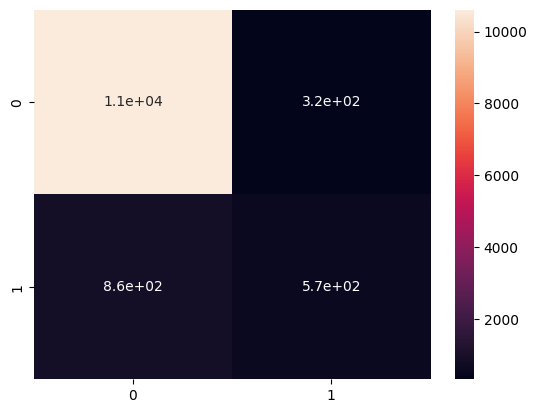

In [25]:
sns.heatmap(cm, annot=True)
plt.show()

In [17]:
c_report = classification_report(y_test, y_predicted)
print(c_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10931
           1       0.64      0.40      0.49      1426

    accuracy                           0.90     12357
   macro avg       0.78      0.69      0.72     12357
weighted avg       0.89      0.90      0.90     12357



In [22]:
mean_square_error = mean_squared_error(y_test, y_predicted)
print('The mean squared error:', mean_square_error)

The mean squared error: 0.09508780448328882


In [23]:
determination_coef = r2_score(y_test, y_predicted)
print('The R^2 value:', determination_coef)

The R^2 value: 0.06852437763695085
